### ===================================================================  
>>> # Bank Customer Churn Prediction  
### ===================================================================

## Problem Statement
- Customer churn is a major problem for banks because acquiring new customers is more expensive than retaining existing ones.
- The objective of this project is to build a machine learning model that predicts customers who are likely to leave the bank.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report, auc, roc_auc_score,roc_curve, accuracy_score, precision_score, recall_score,f1_score

### 2. Load Dataset, its Overview and Target variable

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset contains demographic, financial, and account-related information.
The target variable is churn.  
Here:  
- Churn = 0: Customer stayed  
- Churn = 1: Customer left

### 3. Basic EDA(Exploratory Data Analysis)

In [3]:
print("shape:",df.shape) 
print("Null values:\n",df.isnull().sum())
print('Duplicates:',df.duplicated().sum())
print(df.info())

shape: (10000, 12)
Null values:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10 

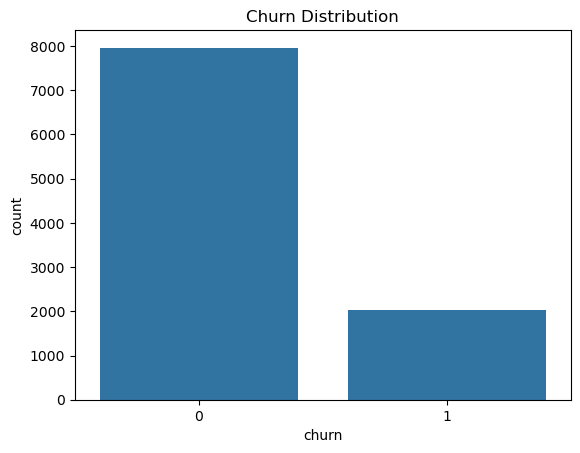

churn
0    7963
1    2037
Name: count, dtype: int64


In [4]:
## Visualizing class imbalance
sns.countplot(x=df.churn)
plt.title('Churn Distribution')
plt.show()
print(df['churn'].value_counts())

In [5]:
# Dropping irrelevent column
df.drop(columns='customer_id',inplace = True)

### 4. Target / Predictor separatoration

In [6]:
X = df.drop(columns='churn')
y = df.churn

### 5.Train Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, stratify=y)

### 6. Identify numerical and categorical columns

In [8]:
num_col = ['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']
cat_col = ['country','gender']

### 6. Preprocessing Techniques

In [9]:
preprocessor = ColumnTransformer([
    ('num',MinMaxScaler(),num_col), #scaling down the numeric columns 
    ('cat',OneHotEncoder(drop = 'first'),cat_col) # encoding the categorical columns
])

### 7. Implementing Logistic Regression Model

In [10]:
pipeline_lr = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessing
    ('smote',SMOTE(random_state=42)), # Handle class imbalance using SMOTE
    ('model',LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42))#training model
])

In [11]:
#Training model
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [12]:
# Prediction using model
y_pred_lr = pipeline_lr.predict(X_test) #predicted classes
y_prob_lr = pipeline_lr.predict_proba(X_test)[:,1]#predicted probobilities for roc

In [13]:
#Evaluating model
print('Logistic Regression for classification Report')
print(classification_report(y_test,y_pred_lr))
print('roc_auc score:',roc_auc_score(y_test,y_prob_lr))

Logistic Regression for classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1991
           1       0.40      0.72      0.51       509

    accuracy                           0.72      2500
   macro avg       0.65      0.72      0.66      2500
weighted avg       0.81      0.72      0.75      2500

roc_auc score: 0.7873998809969026


### 8. Implementing Random Forest Classifier

In [14]:
pipeline_rfc = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE(random_state=42)),  #Although SMOTE is optional, applying SMOTE resulted slight improvement in model performance
    ('model',RandomForestClassifier(random_state=42))
])

In [15]:
# training model
pipeline_rfc.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [16]:
# prediction using model
y_pred_rfc = pipeline_rfc.predict(X_test) 
y_prob_rfc = pipeline_rfc.predict_proba(X_test)[:,-1]

In [17]:
# Evaluating model
print('Classification report of Random Forest Classifier')
print(classification_report(y_test,y_pred_rfc))
print('roc_auc_score:',roc_auc_score(y_test,y_prob_rfc))

Classification report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1991
           1       0.62      0.63      0.62       509

    accuracy                           0.84      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.85      0.84      0.84      2500

roc_auc_score: 0.8605601434352425


### 9. Implementing AdaBoost Classifier

In [18]:
#create a pipeline
pipeline_ab = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE(random_state=42)),  #Although SMOTE is optional, applying SMOTE resulted slight improvement in model performance
    ('Model',AdaBoostClassifier(random_state=42))
])

In [19]:
#training model
pipeline_ab.fit(X_train,y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('Model', AdaBoostClassifier(random_state=42))])

In [20]:
#prediction using model
y_pred_ab = pipeline_ab.predict(X_test)
y_prob_ab = pipeline_ab.predict_proba(X_test)[:,-1] 

In [21]:
#Evaluating model
print('roc_auc_score',roc_auc_score(y_test,y_prob_ab))
print('Classification report of AdaBoost Classifier')
print(classification_report(y_test,y_pred_ab))

roc_auc_score 0.8548699994770179
Classification report of AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1991
           1       0.50      0.74      0.60       509

    accuracy                           0.80      2500
   macro avg       0.71      0.78      0.73      2500
weighted avg       0.84      0.80      0.81      2500



### 10. Implementing Gradient Boosting Classifier

In [22]:
# create a pipeline for model
pipeline_gb = Pipeline([
    ('preprocessor',preprocessor), #apply preprocessor
    ('smote',SMOTE(random_state=42)),   #Although SMOTE is optional, applying SMOTE resulted slight improvement in model performance
    ('model',GradientBoostingClassifier(random_state=42))
])

In [23]:
#training model
pipeline_gb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', GradientBoostingClassifier(random_state=42))])

In [24]:
#Prediction using model
y_pred_gb = pipeline_gb.predict(X_test)
y_prob_gb = pipeline_gb.predict_proba(X_test)[:,1]

In [25]:
#Evaluating model

print('Classification report of Gradient Boosting Classifier is')
print(classification_report(y_test,y_pred_gb))
print('roc_auc_score is:',roc_auc_score(y_test,y_prob_gb))

Classification report of Gradient Boosting Classifier is
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1991
           1       0.58      0.68      0.63       509

    accuracy                           0.83      2500
   macro avg       0.75      0.78      0.76      2500
weighted avg       0.85      0.83      0.84      2500

roc_auc_score is: 0.8697522939672534


### Hyperparameter Tuning on Gradinet Boosting Classifier

- The Gradient Boosting Classifier performed better than all other models, so we applied hyperparameter tuning to it.

In [26]:
#create a prameter grid
param_grid = {
    'model__n_estimators':[50,70,90],
    'model__learning_rate':[0.02,0.03,0.04],
    'model__max_depth':[2,3,4,5]
} 
gscv = GridSearchCV(estimator=pipeline_gb,param_grid=param_grid, cv =5,n_jobs=-1, verbose=3)
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.02, 0.03, 0.04],
                         'model__max_depth': [2, 3, 4, 5],
                         'model__n_estimators': [50, 70, 90]},
             verbose=3)

In [27]:
y_pred_gscv = gscv.predict(X_test)
y_prob_gscv = gscv.predict_proba(X_test)[:,1]

In [28]:
print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1991
           1       0.60      0.70      0.64       509

    accuracy                           0.84      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.85      0.84      0.85      2500



### Feature Importance 

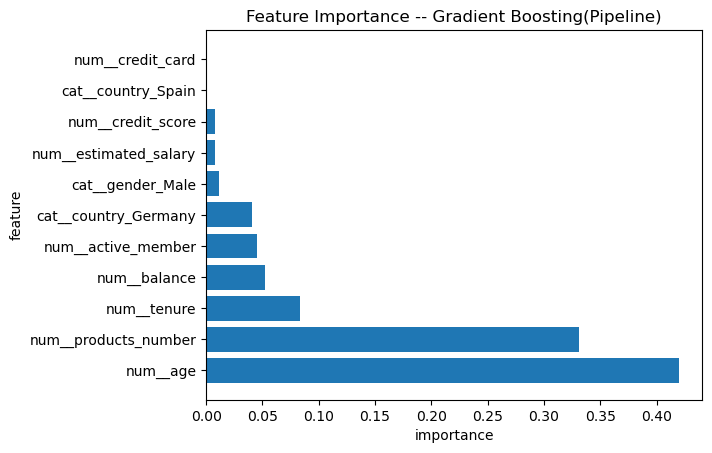

In [29]:
gb_model = pipeline_gb.named_steps['model']
importanc = gb_model.feature_importances_
feature_names = pipeline_gb.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importanc}).sort_values('Importance',ascending=False)
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('Feature Importance -- Gradient Boosting(Pipeline)')
plt.show()

- The feature importance graph shows which features have the most influence on churn prediction.  
- Age and the number of products are the most important features, indicating that they strongly affect customer churn.  
- Other features such as balance, active member status, tenure, and gender have a comparatively lower impact.

### AGE VS CHURN

- Since age is a continuous variable with many unique values, it is difficult to interpret directly.

In [30]:

df['Age_group'] = pd.cut(df['age'],bins=[18,30,40,50,60,70,100],labels=['18-30','31-30','41-50','51-60','61-70','70+'])

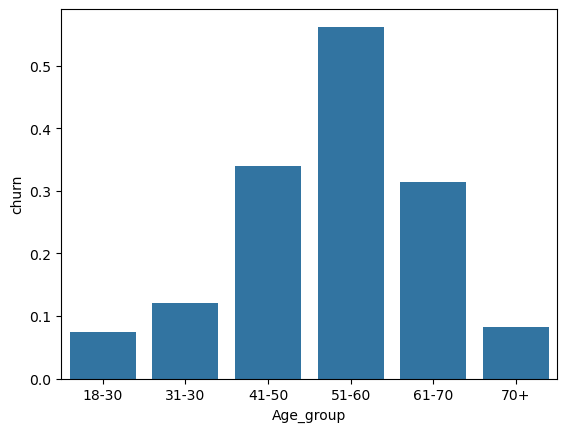

In [31]:
sns.barplot(x=df.Age_group,y=df.churn,errorbar=  None)
plt.show()

- The graph shows the churn rate across different age groups.
- Churn is lowest among younger customers and increases with age.
- The churn rate is highest for customers aged 51–60.
- After age 60, the churn rate decreases again.

### Product Number VS Churn

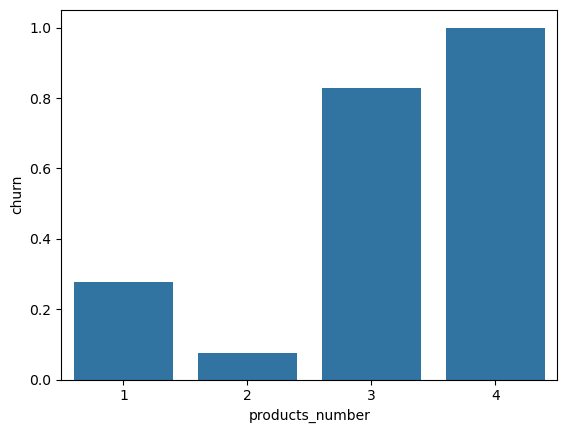

In [32]:
sns.barplot(x=df.products_number,y = df.churn, errorbar=None)
plt.show()

- Customers using fewer bank products have a higher probability of churn.

### 11. Comparing AUC-Curve with AUC score of all models

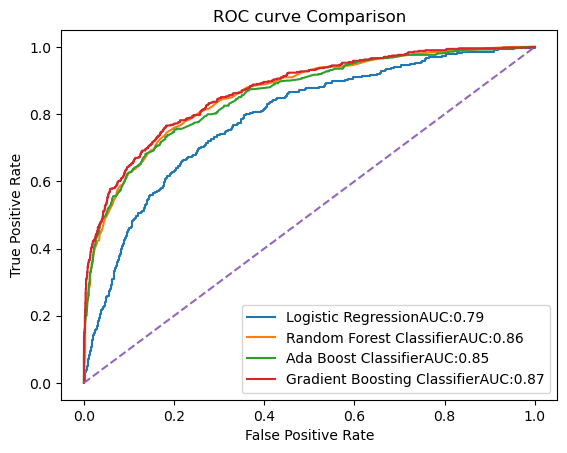

In [33]:
models = {
    'Logistic Regression':y_prob_lr,
    'Random Forest Classifier': y_prob_rfc,
    'Ada Boost Classifier':y_prob_ab,
    'Gradient Boosting Classifier': y_prob_gb
}
for name,prob in models.items():
    fpr,tpr,_ = roc_curve(y_test,prob)
    plt.plot(fpr,tpr, label=f'{name}AUC:{roc_auc_score(y_test,prob):.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Comparison')
plt.legend()
plt.show()

### ROC Curve Comparison 
- ROC curves were plotted for all models to compare their ability to distinguish between churn and non-churn customers.  
- The model with the curve closest to the top-left corner and the highest AUC score indicates better performance.  
- Among all the models, the Gradient Boosting Classifier showed the highest ROC-AUC and the most stable curve, making it the best model for churn prediction.

### Model Comparison Table

In [34]:
models_comparision = []
models_table = {
    'Logistic Regression': y_pred_lr,
    'Random Forest Classifier':y_pred_rfc,
    'Ada Boost Classifier':y_pred_ab,
    'Gradient Boosting Classifier': y_pred_gb
}
for name1,pred in models_table.items():
    models_comparision.append({'Model':name1,
                      'Precision':precision_score(y_test,pred),
                      'Recall':recall_score(y_test,pred),
                      'F1-score':f1_score(y_test,pred),
                      'ROC-AUC':roc_auc_score(y_test,pred)})
comparison_table = pd.DataFrame(models_comparision)
comparison_table.sort_values('ROC-AUC',ascending = False)

,Model,Precision,Recall,F1-score,ROC-AUC
3,Gradient Boosting Classifier,0.580808,0.677800,0.625567,0.776368
2,Ada Boost Classifier,0.500666,0.738703,0.596825,0.775178
1,Random Forest Classifier,0.615830,0.626719,0.621227,0.763385
0,Logistic Regression,0.397826,0.719057,0.512246,0.720402


### Model Comparison  
- Multiple machine learning models were trained and evaluated for bank customer churn prediction using default hyperparameters.  
- The models were compared using precision, recall, F1-score, and ROC-AUC.  
- Since this is a churn prediction problem, the primary objective is to correctly identify customers who are likely to leave the bank (churn = 1). Therefore, recall and ROC-AUC were given more importance than accuracy.  
- Metrics:  
  - **Precision** indicates how many predicted churned customers actually churned.  
  - **Recall** indicates how many actual churned customers were correctly identified by the model.  
  - **F1-score** provides a balance between precision and recall.  
  - **ROC-AUC** measures the model's ability to distinguish between churn and non-churn customers across different probability thresholds.  
- From the comparison table, the Gradient Boosting Classifier achieved the highest ROC-AUC score and F1-score, indicating a strong balance between identifying churn customers and minimizing false positives.  
- Although the AdaBoost classifier and Logistic Regression showed slightly higher recall, the Gradient Boosting Classifier provides better overall performance and discrimination power.

- **Hence, the Gradient Boosting Classifier was selected as the model for predicting customer churn. We will compare its performance before and after hyperparameter tuning.**

In [35]:
tuning_table = pd.DataFrame([
    {
        'Model':"Gradient Boosting Classifier",
        'Precision':precision_score(y_test,y_pred_gb),
        'Recall':recall_score(y_test,y_pred_gb),
        'F1 Score':f1_score(y_test,y_pred_gb),
        'ROC_AUC':roc_auc_score(y_test,y_prob_gb)
    },
    {
        'Model':"Gradient Boosting Classifier(gscv)",
        'Precision':precision_score(y_test,y_pred_gscv),
        'Recall':recall_score(y_test,y_pred_gscv),
        'F1 Score':f1_score(y_test,y_pred_gscv),
        'ROC_AUC':roc_auc_score(y_test,y_prob_gscv)
    }
])
tuning_table.sort_values('ROC_AUC',ascending = False)

,Model,Precision,Recall,F1 Score,ROC_AUC
1,Gradient Boosting Classifier(gscv),0.601019,0.695481,0.644809,0.873163
0,Gradient Boosting Classifier,0.580808,0.677800,0.625567,0.869752


- After tuning, the model achieved slightly higher recall and ROC-AUC scores, indicating better identification of churn customers.

## Conclusion


- This project demonstrates how machine learning can be used to predict bank customer churn and support proactive customer retention strategies.  
- Customer age plays the biggest role in predicting churn. Churn rates are lowest among younger customers, increase steadily with age, and peak in the 51–60 age group. After age 60, the churn rate decreases again for older customers.  
- Customers using fewer bank products have a higher churn probability.

### Business Recommendation
- Based on the churn analysis, customers aged 51–60 and customers using fewer banking products are at higher risk of churn. The bank should focus on proactive retention strategies for these segments by offering personalized services, increasing product adoption through cross-selling, and using churn prediction models to intervene early. This targeted approach can significantly reduce churn and improve customer lifetime value while optimizing retention costs.